# 속성 데이터 회귀 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/car_regression.csv

--2021-09-24 16:26:31--  https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/car_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58697 (57K) [text/plain]
Saving to: ‘car_regression.csv’

car_regression.csv  100%[===================>]  57.32K  --.-KB/s    in 0.006s  

2021-09-24 16:26:31 (8.83 MB/s) - ‘car_regression.csv’ saved [58697/58697]



In [3]:
raw_data = pd.read_csv("car_regression.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,1:]
y = data[:,:1]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [4]:
print(train_x[:5])
print(train_y[:5])

[[ 0.30957112 -0.20461746  0.27358521 -0.32679933 -0.95739638  0.81993056
   1.          0.          0.        ]
 [-0.86291079 -0.36707301  0.0137853  -0.20906952 -0.41369436  1.09139405
   1.          0.          0.        ]
 [-0.86291079 -0.51997236 -0.47983453 -0.2208425   0.02126726  1.63432105
   1.          0.          0.        ]
 [-0.86291079 -0.93088936 -0.42787455 -1.03317817  0.34748847 -1.08031391
   0.          0.          1.        ]
 [ 1.48205303  1.07591459  0.66328508  1.31906339 -0.55868157 -1.08031391
   1.          0.          0.        ]]
[[ 0.42973458]
 [ 0.57066975]
 [ 0.45535916]
 [ 0.45535916]
 [-1.3383611 ]]


In [5]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 9)
(313, 1)
(79, 9)
(79, 1)


# Template

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


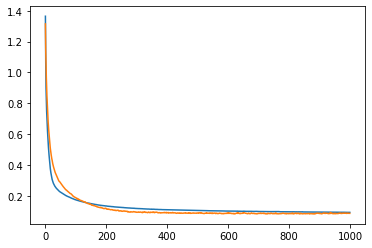

3/3 [==============================] - 0s 4ms/step - loss: 0.1229 - mape: 203.4032
loss= 0.12286374717950821
mape= 203.4031524658203


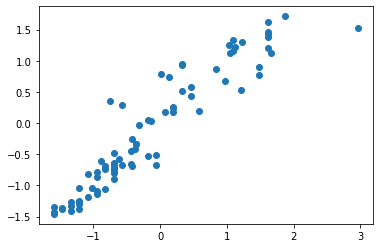

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(9,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()